Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [2]:

import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
### YOUR CODE HERE 
import matplotlib.pyplot as plt


###1) What are the appropriate visualizations to answer the question "What was the typical fare paid for passage on the Titanic?"



Histograms and Box Plots

###2) Create the visualizations you selected in 2).  

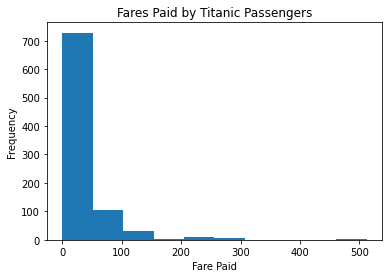

In [4]:
### YOUR CODE HERE 
plt.hist(Titanic['Fare'])

plt.xlabel('Fare Paid')
plt.ylabel('Frequency')
plt.title('Fares Paid by Titanic Passengers')
plt.show()

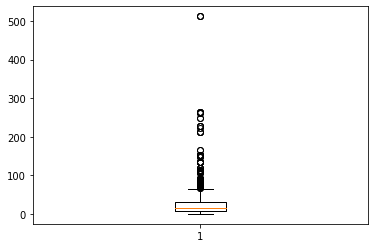

In [5]:
plt.boxplot(Titanic['Fare']);

###3) Describe your results in a sentence or two.

Unimodal and Positively skewed with many outliers

###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

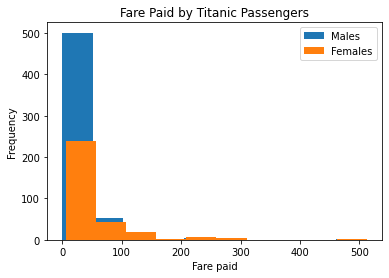

In [6]:
### YOUR CODE HERE 
Titanic_M = Titanic[Titanic['Sex'] == 'male']
Titanic_F = Titanic[Titanic['Sex'] == 'female']

plt.hist(Titanic_M['Fare'], label = 'Males')
plt.hist(Titanic_F['Fare'], label = 'Females')

plt.xlabel('Fare paid')
plt.ylabel('Frequency')
plt.title('Fare Paid by Titanic Passengers')
plt.legend(loc='upper right')

plt.show()

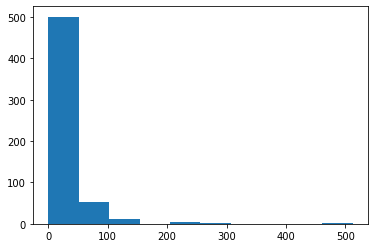

In [7]:
plt.hist(Titanic_M['Fare']);

###5) Describe the difference in distribution of fare paid between male and female passengers.

Looks like the distribution in fare paid is the same for both male and female, but there were a lot more male passengers who paid less than $100

###6) Make a bar plot to show the frequency of individuals in each passenger class.

col_0   count
Pclass       
1         216
2         184
3         487


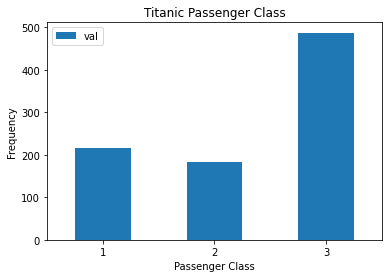

In [19]:
### YOUR CODE HERE 
print(pd.crosstab(index=Titanic['Pclass'], columns="count"))

df = pd.DataFrame({'lab':[1,2,3], 'val':[216,184,487]})

ax = df.plot.bar( x = 'lab', y = 'val', rot = 0)

plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.title('Titanic Passenger Class')

plt.show()

###7) Summarize your results from 6)

Most passengers were in 3rd class, while the fewest amount of passengers were in 2nd class.

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

col_0                    count
Parents/Children_Aboard       
0                          674
1                          118
2                           80
3                            5
4                            4
5                            5
6                            1


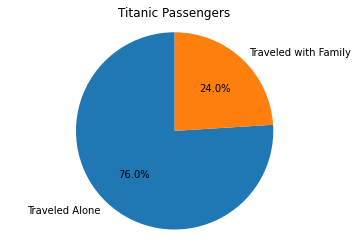

In [24]:
### YOUR CODE HERE 
print(pd.crosstab(index=Titanic['Parents/Children_Aboard'], columns="count"))

labels = 'Traveled Alone','Traveled with Family'
sizes = 674, sum([118,80,5,4,5,1])

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Titanic Passengers')

plt.show()

###9) Summarize your results from 8).  Did most individuals travel alone or with family?

Most titanic passengers traveled alone

###In 10) - 14)  We will use figure, axes syntax to plot passenger survival by whether the passenger was a child or an adult. 

###10) Create a variable to categorize the passenger as a child (under age 18) or adult (18 years or older).

In [28]:
### YOUR CODE HERE 
Titanic.loc[Titanic['Age'] < 18, 'Child'] = 'Not_Adult'
Titanic.loc[Titanic['Age'] >= 18, 'Child'] = 'Adult'

Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare,Child
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Adult
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Adult
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Adult
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Adult
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Adult


In [38]:
Titanic[Titanic['Age'] < 18]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare,Child
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,Not_Adult
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708,Not_Adult
10,1,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000,Not_Adult
14,0,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542,Not_Adult
16,0,3,Master. Eugene Rice,male,2.0,4,1,29.1250,Not_Adult
...,...,...,...,...,...,...,...,...,...
849,1,1,Miss. Mary Conover Lines,female,16.0,0,1,39.4000,Not_Adult
859,0,3,Miss. Dorothy Edith Sage,female,14.0,8,2,69.5500,Not_Adult
865,1,3,Master. Harold Theodor Johnson,male,4.0,1,1,11.1333,Not_Adult
871,1,3,Miss. Adele Kiamie Najib,female,15.0,0,0,7.2250,Not_Adult


###11) Make a cross-tab of survival by age (child vs adult).

In [29]:
### YOUR CODE HERE 
print(pd.crosstab(Titanic['Survived'], Titanic['Child']))

Child     Adult  Not_Adult
Survived                  
0           480         65
1           277         65


###12) Create a new data frame to hold the data for the figure.

In [30]:
### YOUR CODE HERE 
ct = pd.DataFrame({'Adult':[480,277], 'Not_Adult':[65,65]})

ct

,Adult,Not_Adult
0,480,65
1,277,65


###13) Adapt the plot from the Guided Project to show the relationship between passenger age (child vs adult) and survival.

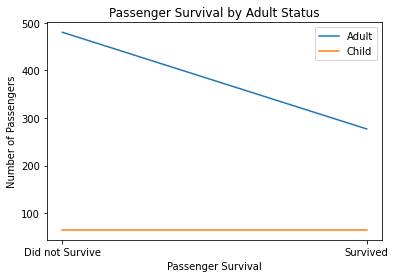

In [37]:
### YOUR CODE HERE 
fig, ax = plt.subplots()

my_ticks =['Did not Survive', 'Survived']

ax.plot(my_ticks, ct['Adult'], label = 'Adult')
ax.plot(my_ticks, ct['Not_Adult'], label = 'Child')

ax.set_title("Passenger Survival by Adult Status")
ax.set_xlabel("Passenger Survival")
ax.set_ylabel("Number of Passengers")

ax.legend()
plt.show()

###14) Summarize your results about passenger survival by age.

An equal amount of children did not survive and did survive the titanic, while for adults, much more of them did not survive the titanic, than did survive.

#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)